In [121]:
import pandas as pd

with open('revenue.csv') as f:
    X = pd.read_csv(f, index_col=0, usecols=[0,1,2,3,4])
X_norm = X.iloc[:,1:].div(X['地区生产总值'], axis=0)
X[:3]

,地区生产总值,第一产业增加值,第二产业增加值,第三产业增加值
北京市,35371.28,113.69,5715.06,29542.53
天津市,14104.28,185.23,4969.18,8949.87
河北省,35104.52,3518.44,13597.26,17988.82


In [194]:
from sklearn.cluster import KMeans
X_percent = X.iloc[:,1:].div(X['地区生产总值'], axis=0)
X_norm = (X_percent - X_percent.mean()) / X_percent.std()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_norm)

In [195]:
', '.join(X_norm[kmeans.labels_==2].index)

'吉林省, 黑龙江省, 广西壮族自治区, 海南省, 贵州省, 云南省, 甘肃省, 新疆维吾尔自治区'

/home/colorfulgreen/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>,
       <AxesSubplot:ylabel='2'>], dtype=object)

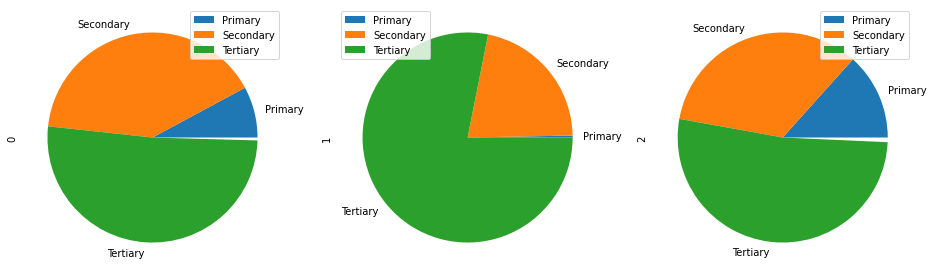

In [218]:
import numpy as np
pd.DataFrame([X_percent[kmeans.labels_==0].median(),
                    X_percent[kmeans.labels_==1].median(),
                    X_percent[kmeans.labels_==2].median()]).rename({u'第一产业增加值': 'Primary',
                                                                    u'第二产业增加值': 'Secondary',
                                                                    u'第三产业增加值': 'Tertiary', },
                                                                  axis=1).T.plot.pie(subplots=True, figsize=(16,5))

Text(0.5, 0, 'third')

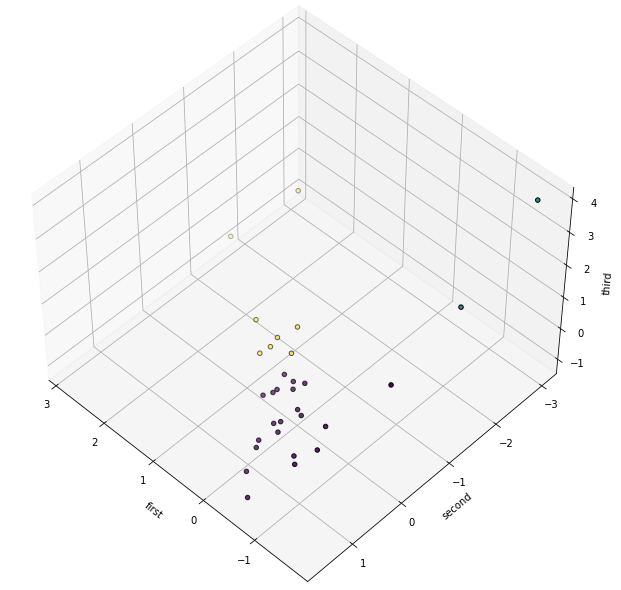

In [154]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 8))
#ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
labels = kmeans.labels_
ax.scatter(X_norm['第一产业增加值'],X_norm['第二产业增加值'], X_norm['第三产业增加值'],
               c=labels.astype(float), edgecolor='k')
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')

In [219]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

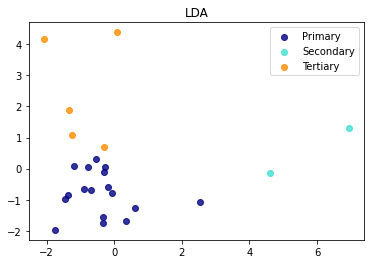

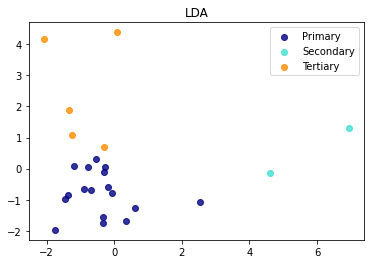

[2 0 0 0 0 0 0]
[2 0 0 2 0 0 2]


In [274]:
def validate(lda, X, y):
    X_valid = X[24:]
    y_valid = y[24:]
    y_pred = lda.predict(X_valid)
    print(y_pred)
    print(y_valid)
    
'''LDA'''
X = X_norm[:24]
y = kmeans.labels_[:24]
target_names = ['Primary', 'Secondary', 'Tertiary']
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()
validate(lda, X_norm, kmeans.labels_)

[2 0 0 2 2 0 2]
[2 0 0 2 0 0 2]


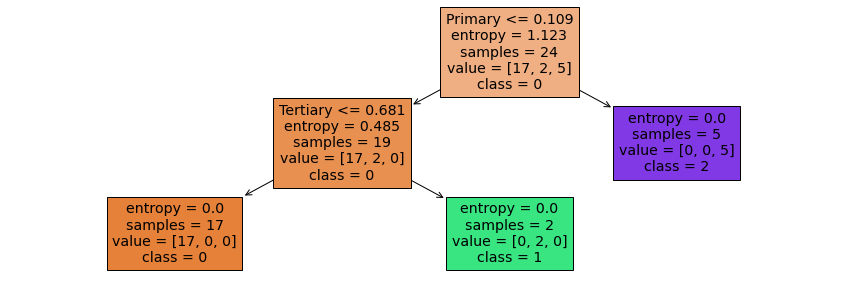

In [273]:
from sklearn import tree

X = X_percent[:24]
y = kmeans.labels_[:24]

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X, y)

plt.figure(figsize=(15,5))
_ = tree.plot_tree(clf, 
                   feature_names=['Primary', 'Secondary', 'Tertiary'], 
                   class_names=['0', '1', '2'],
                   filled=True,
                   impurity=True) 
validate(clf, X_norm, kmeans.labels_)